In [ ]:
#p 316

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("auto-mpg.csv", header = 0)

In [6]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [8]:
#drop columns + 
df = df.drop(['horsepower', 'origin', 'car_name'], axis=1, inplace=False)
df[:2]

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70


In [9]:
df.shape

(398, 6)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
y = df['mpg']
X =df.drop(['mpg'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
lr = LinearRegression().fit(X_train, y_train)

In [14]:
y_predict = lr.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(y_test, y_predict)))

MSE : 11.626, RMSE : 3.410
R^2(Variance score) : 0.814


In [21]:
print('Y절편', np.round(lr.intercept_, 2))
print('회귀계수값', np.round(lr.coef_, 2))

Y절편 -17.09
회귀계수값 [-0.07  0.01 -0.01  0.2   0.75]


In [25]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

model_year      0.75
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.07
dtype: float64

In [29]:
import seaborn as sns

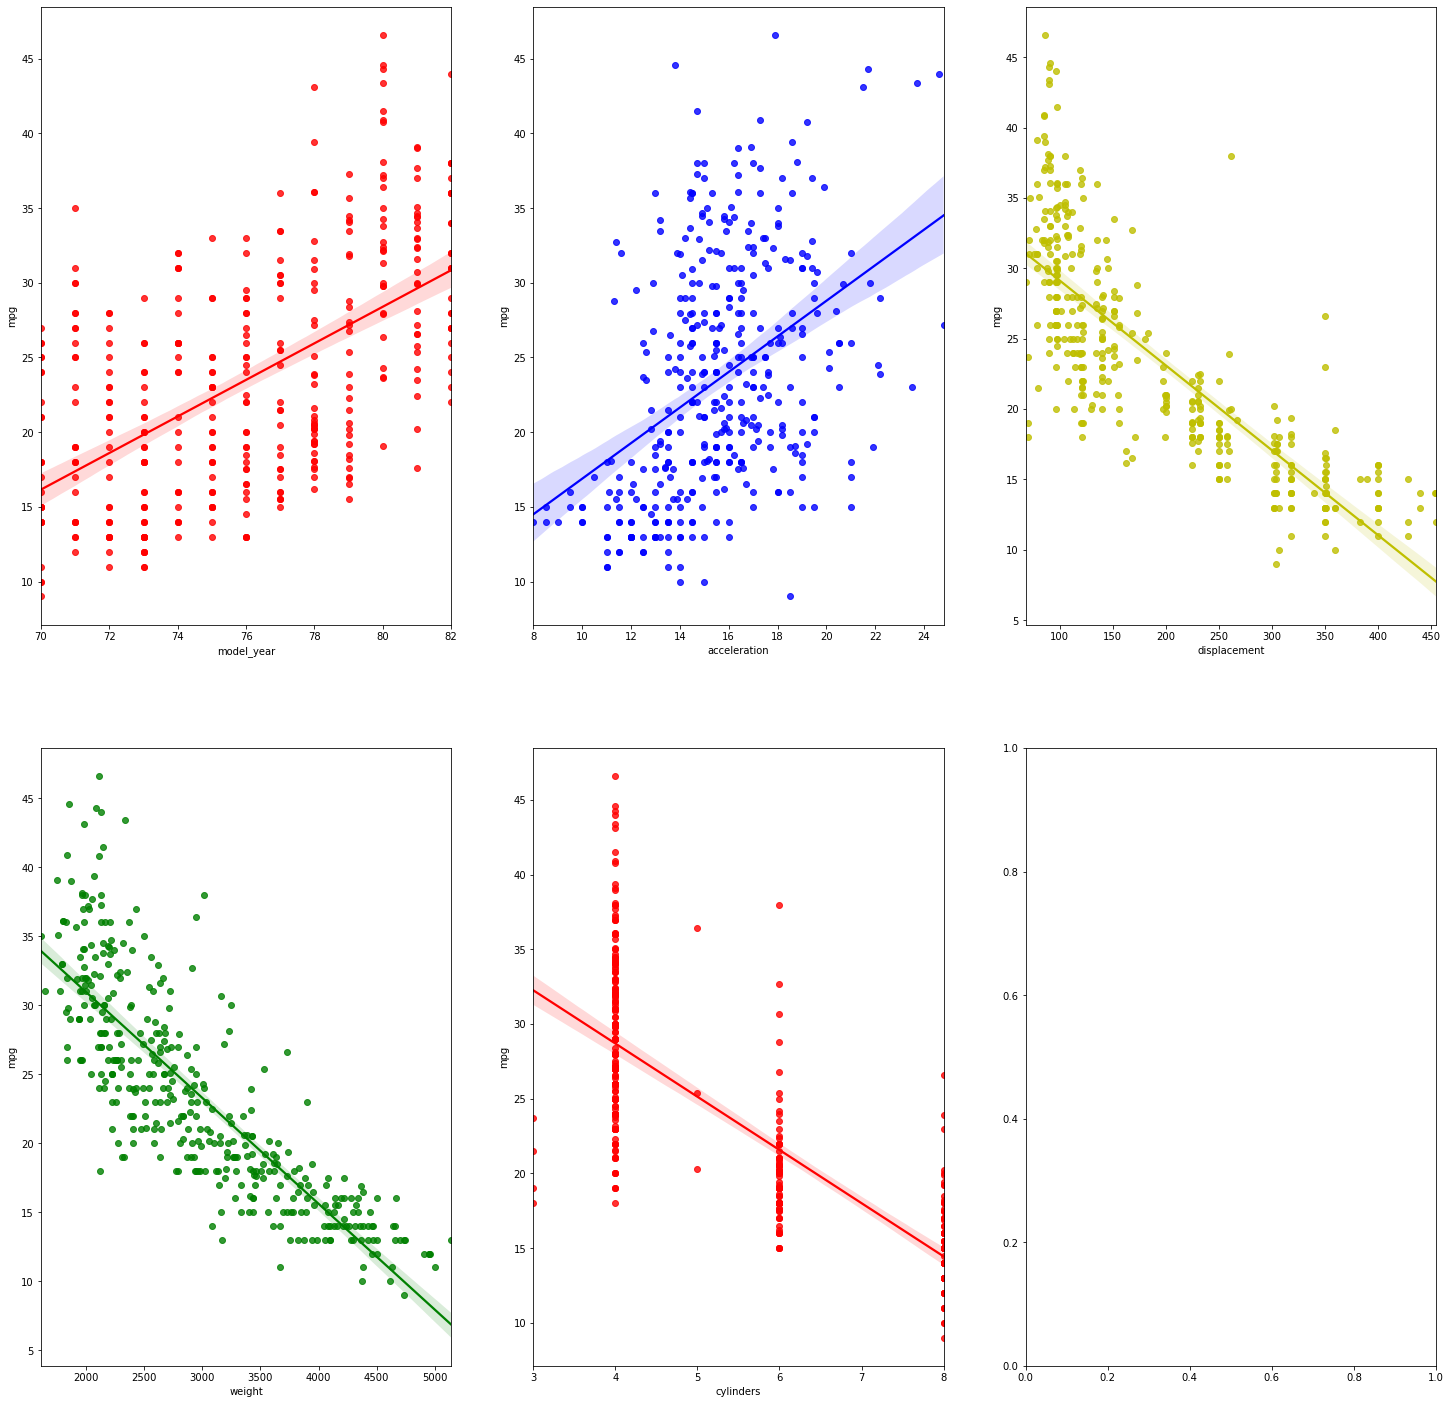

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(25,25))
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, features in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = features, y = 'mpg', data = df, ax=axs[row][col], color=plot_color[i])

In [38]:
df.corr(method='pearson')

,mpg,cylinders,displacement,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


'1.2.4'

ERROR: Invalid requirement: '=='


In [85]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test, = train_test_split(cancer.data, cancer.target, random_state=1)

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [89]:
X_train_s = scaler.transform(X_train)

In [90]:
X_train_s.shape

(426, 30)

In [91]:
#p182

In [57]:
from sklearn.datasets import make_blobs
from matplotlib.pyplot as plt

SyntaxError: invalid syntax (<ipython-input-57-f7d7eee9d060>, line 2)

In [92]:
from matplotlib.pyplot as plt

SyntaxError: invalid syntax (<ipython-input-92-819dae71ed12>, line 1)

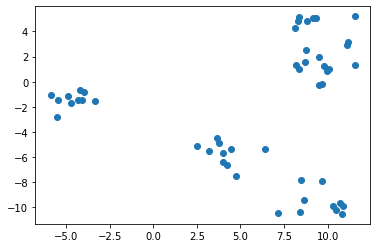

In [59]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=1)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

NameError: name 'x' is not defined

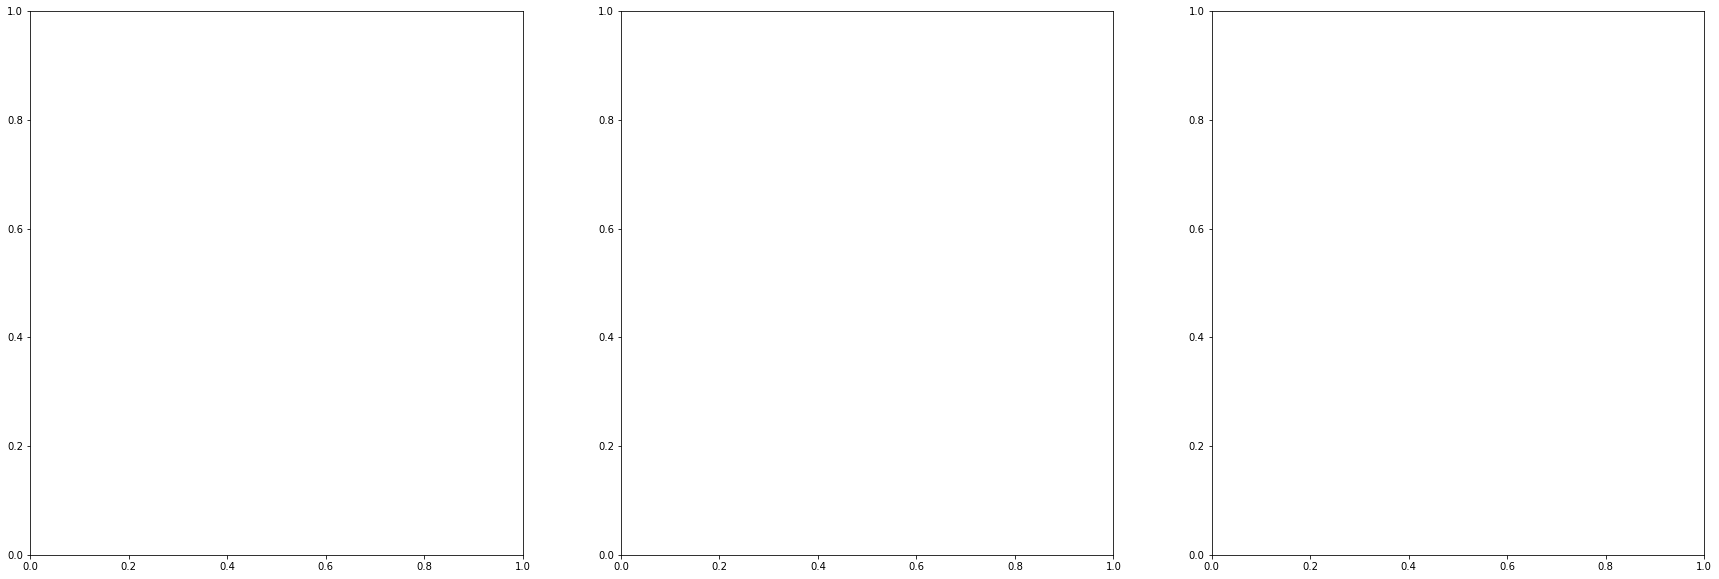

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
axes[0].scatter(x)


#scaler = MinMaxScaler().fit(X_train)
#X_train_s = scaler.transform(X_train)
#x_test_s = scaler.transform(X_test)

X_train_s = MinMaxScaler().fit_transform(X_train)
X_test_s = MinMaxScaler().fit_transform(X_test)

axes[2].scatter(X_train_s[:,0], X_train_s[:,1], c='r', s=150)
axes[2].scatter(X_test_s[:,0], X_test_s[:,1], c='b', s=200)
axes[2].set_titme("scaled")

In [93]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(gamma='auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.6293706293706294

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

svm = SVC(gamma='auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.965034965034965

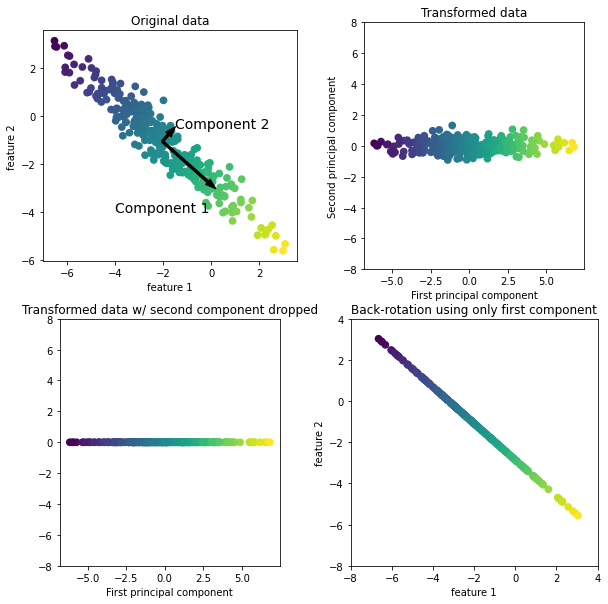

In [95]:
import mglearn
mglearn.plots.plot_pca_illustration()

In [ ]:
# p199 L.17
# X_train_s

In [96]:
from sklearn.decomposition import PCA

In [98]:
# 데이터의 처음 두 개 주성분만 유지시킴
# 무슨정보인지는 모르지만 30개의 성분중에 가장 중요한 어떠한 데이터
pca = PCA(n_components=2)
# 유방암 데이톨 PCA모델 생성
pca.fit(X_train_s)
X_train_pca = pca.transform(X_train_S)

NameError: name 'X_train_S' is not defined

In [75]:
X_train_s.shape

(426, 30)

In [80]:
# 위의 30개 중에서 선택된것이 아니라, 수학적으로 선택됨
X_train_pca.shape

(426, 2)

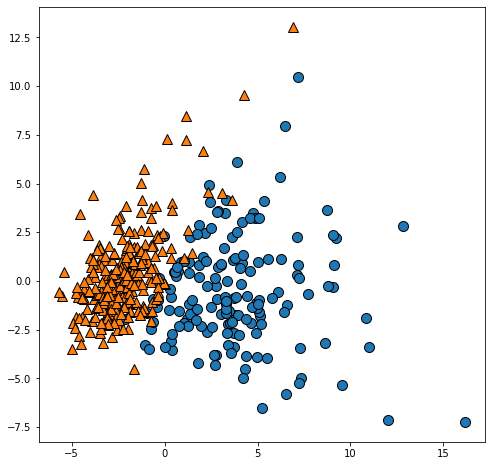

In [82]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1],
                        y_train)

In [105]:
print(pca.components_.shape)

(2, 30)


In [106]:
print(pca.components_)

[[ 0.22136524  0.10000219  0.22951811  0.22352098  0.14302288  0.24211071
   0.26026925  0.26425272  0.1342154   0.058505    0.20686479  0.00729622
   0.20987422  0.20223841  0.01725187  0.16639025  0.13855921  0.17994092
   0.02943904  0.10192967  0.23041956  0.100572    0.23779661  0.22751009
   0.13135979  0.21077884  0.2301419   0.25334406  0.11911651  0.13088259]
 [-0.2301732  -0.05721755 -0.21335503 -0.22693534  0.17877041  0.14744861
   0.06557463 -0.03134067  0.19050711  0.36396122 -0.10501365  0.0939736
  -0.0974744  -0.14961032  0.21204003  0.235435    0.21050921  0.15228014
   0.1810749   0.27867942 -0.2159829  -0.04249497 -0.20003599 -0.21518192
   0.17146856  0.13883173  0.10503362  0.00064033  0.14065767  0.27318654]]


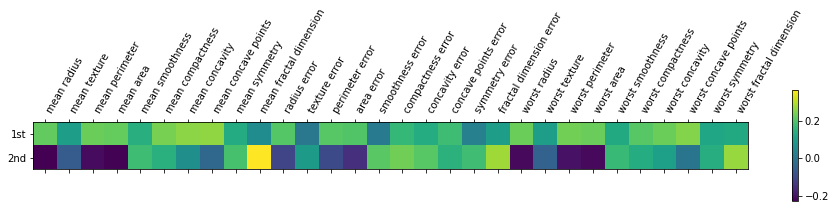

In [107]:
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0,1], ['1st', '2nd'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.show()

In [ ]:
#p203 

In [110]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

